In [8]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
with open("history/results-all-models.json", "r") as f:
    history = json.load(f)

In [10]:
history_folder = "history"
for fname in os.listdir(history_folder):
    if fname.startswith("results-rnn") and fname.endswith("-history.json"):
        model_name = fname[len("results-"):-len("-history.json")]
        with open(os.path.join(history_folder, fname), "r") as f:
            epochs = json.load(f)   # list of dicts
        history[model_name] = epochs

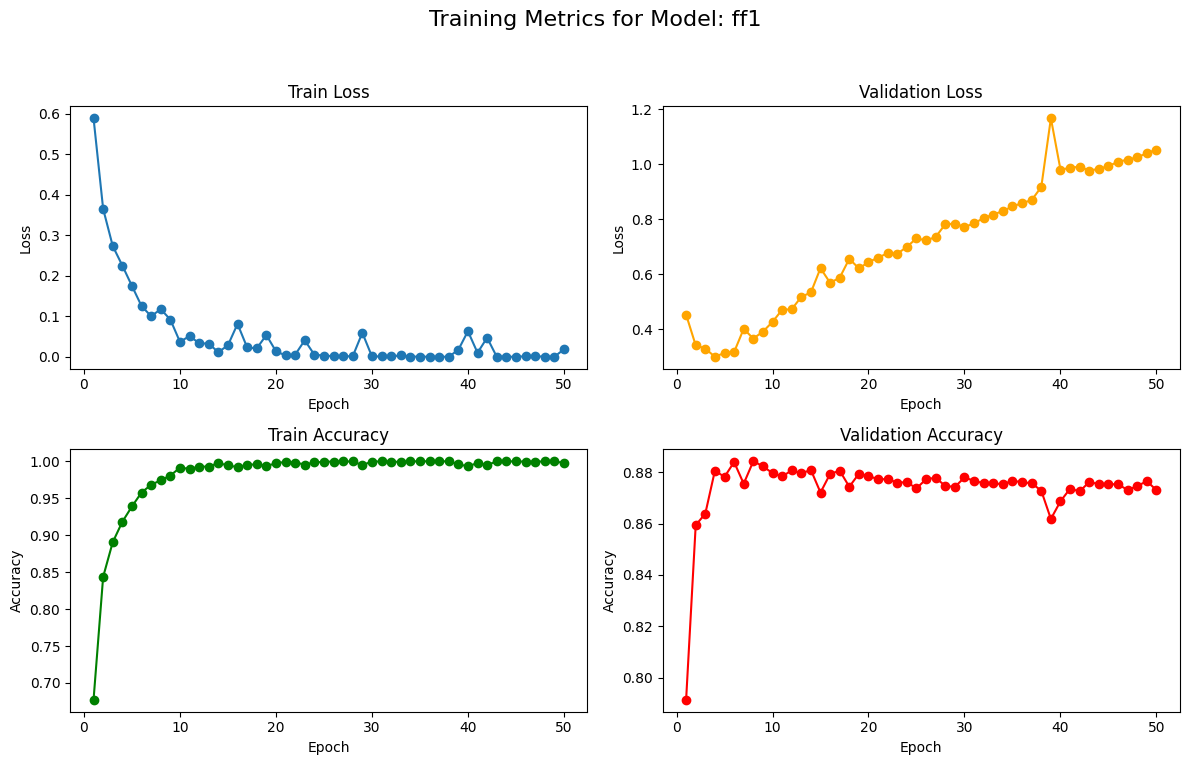

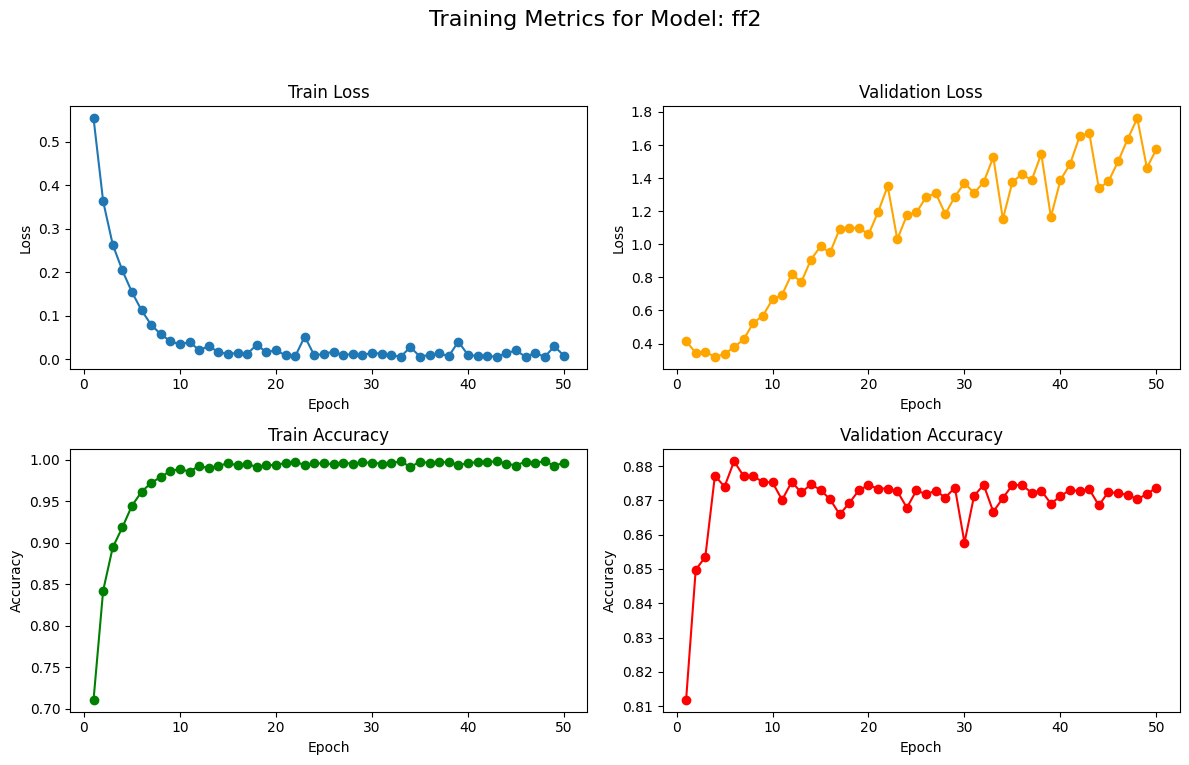

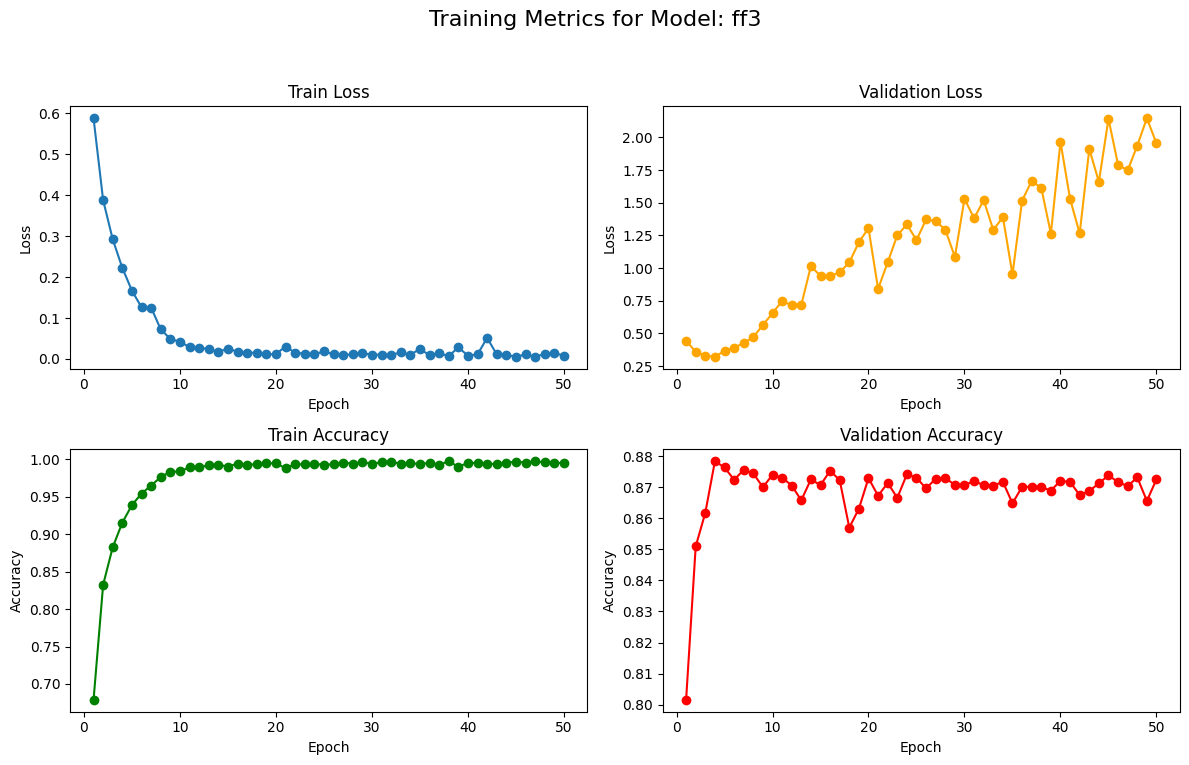

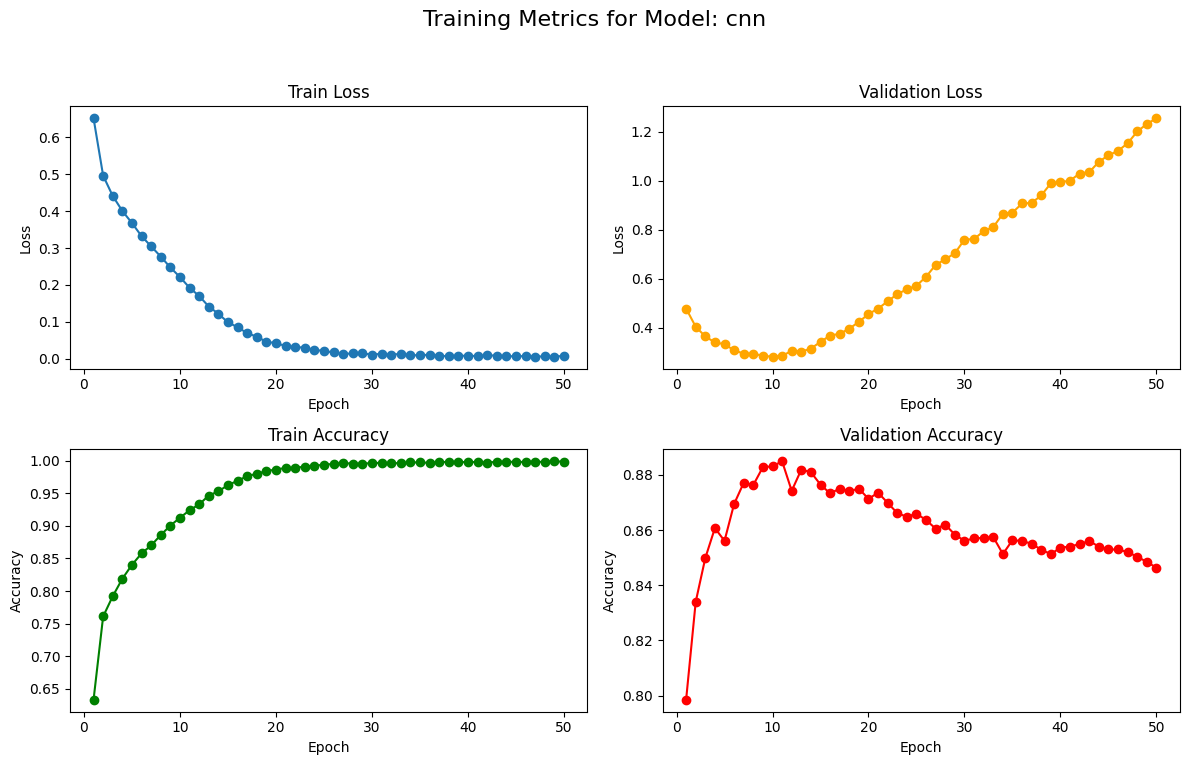

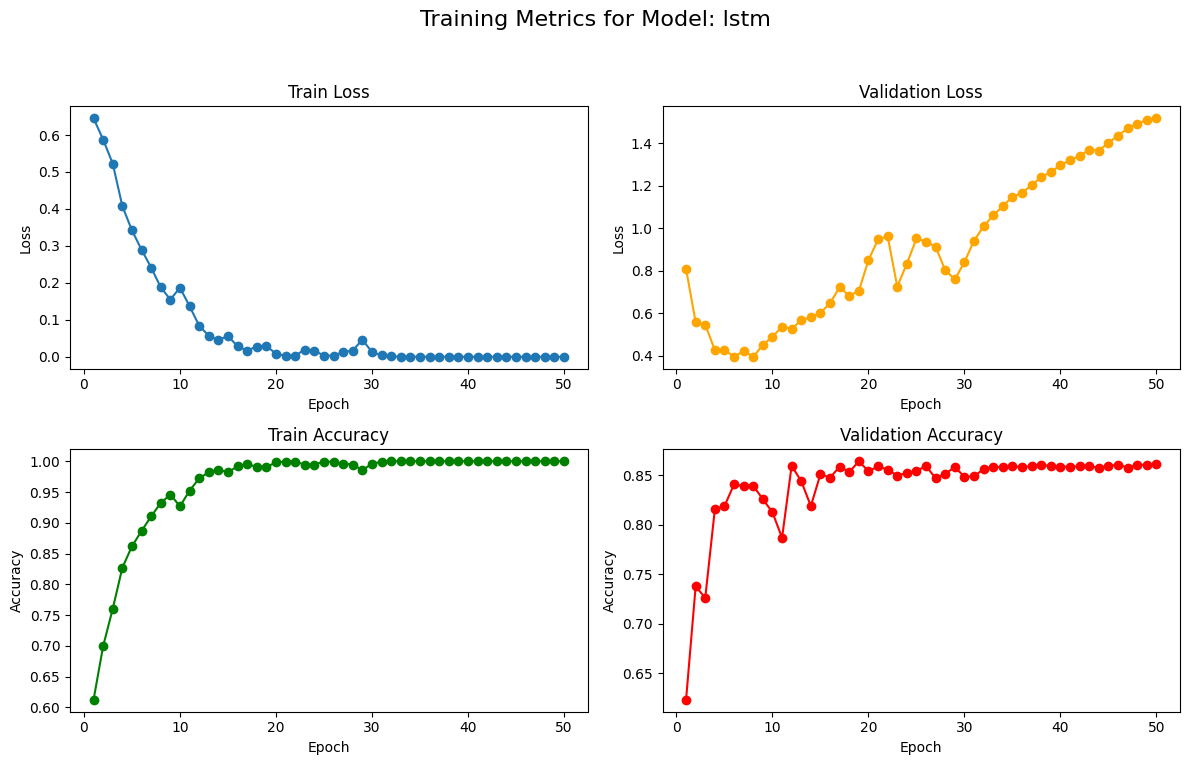

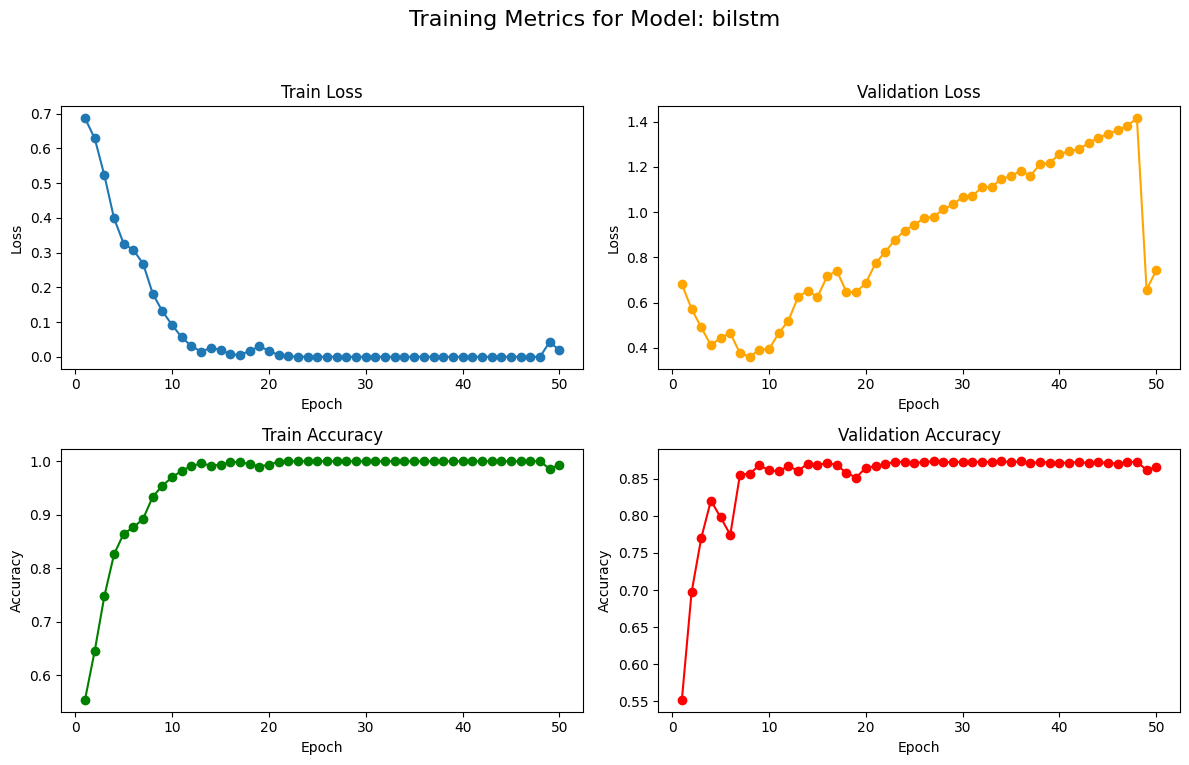

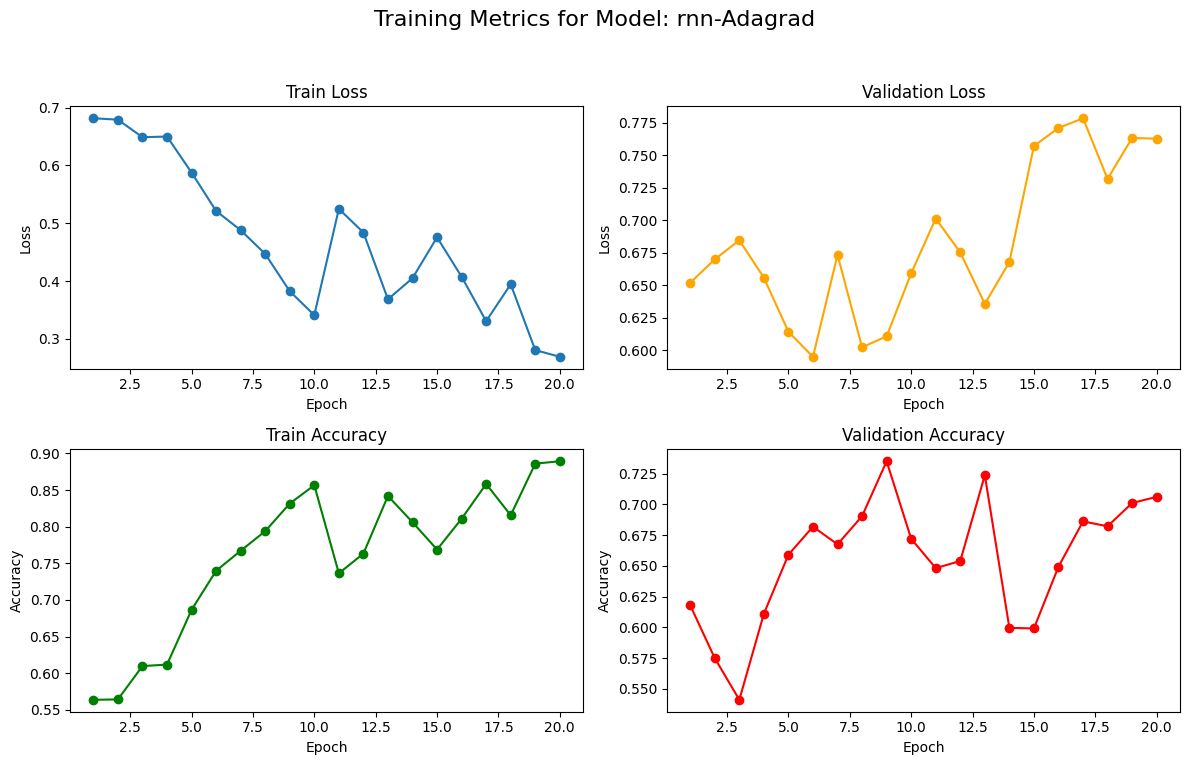

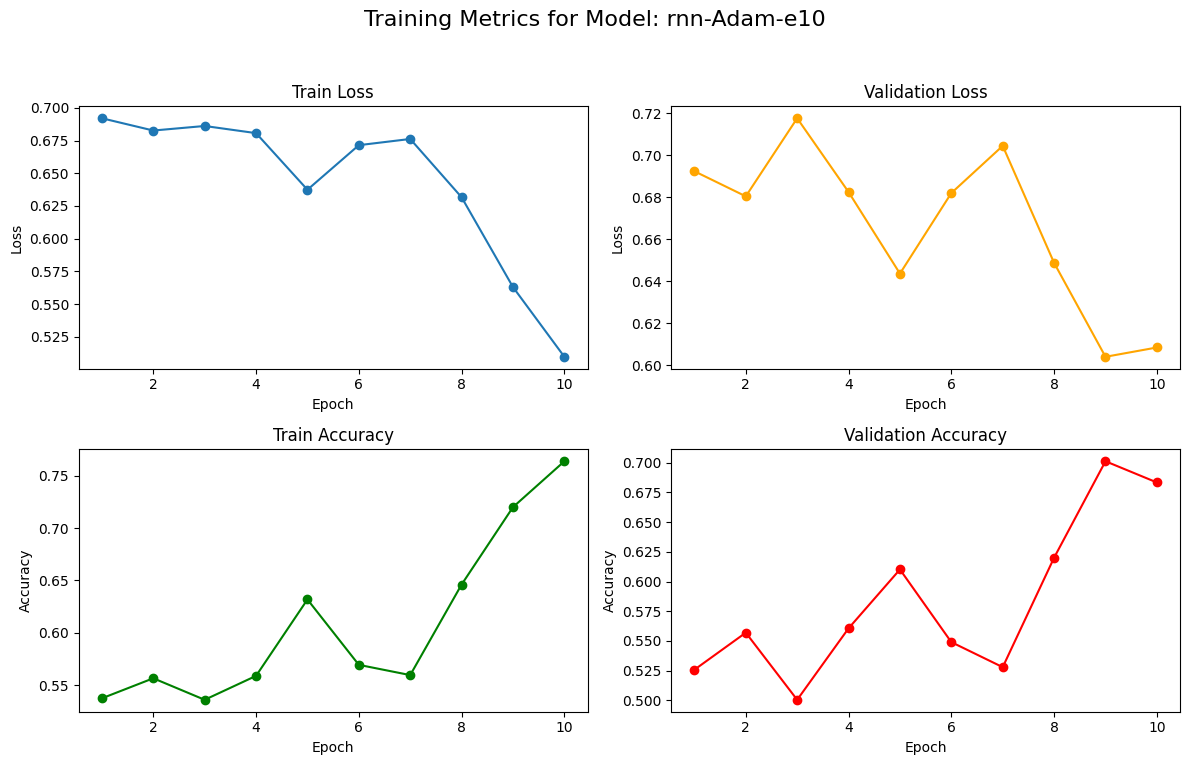

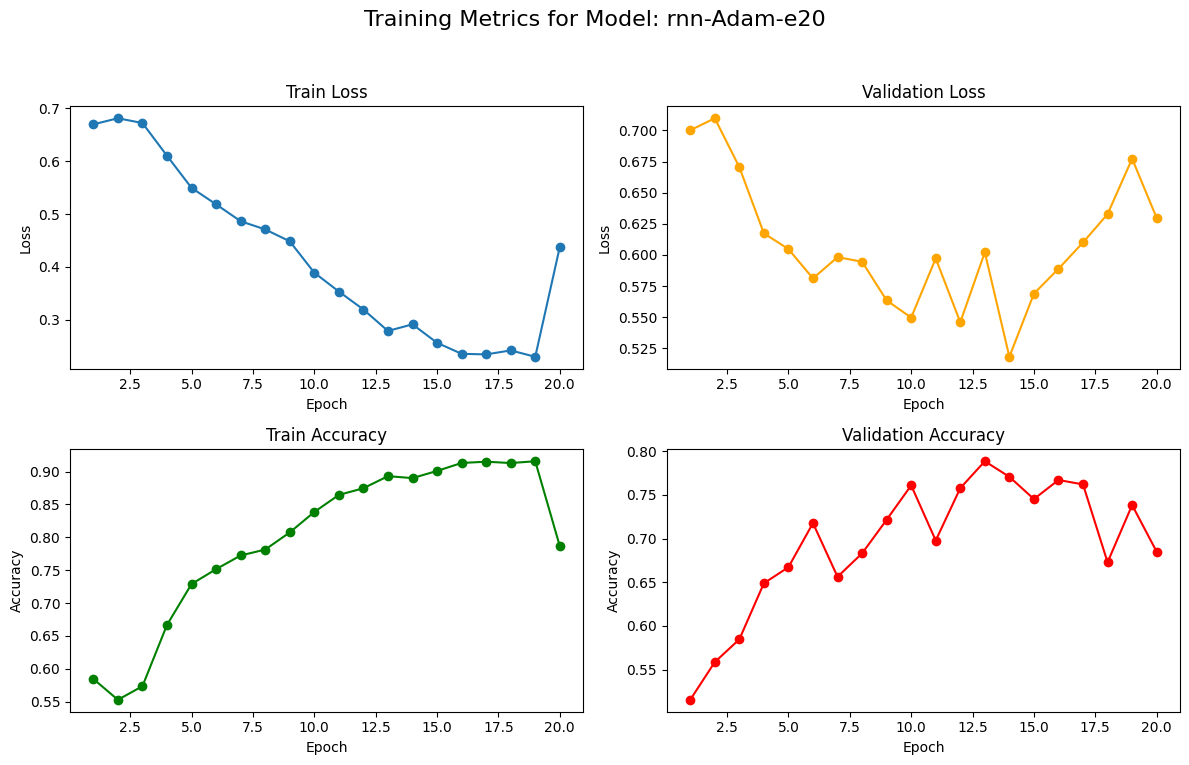

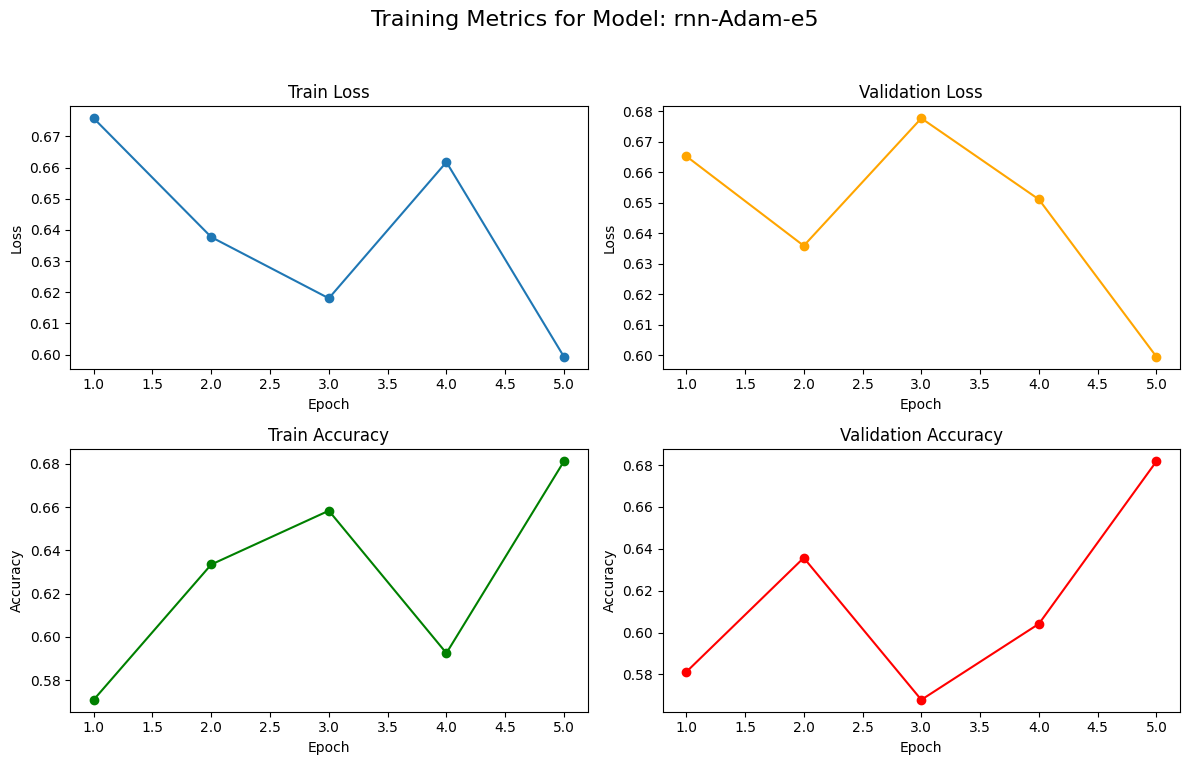

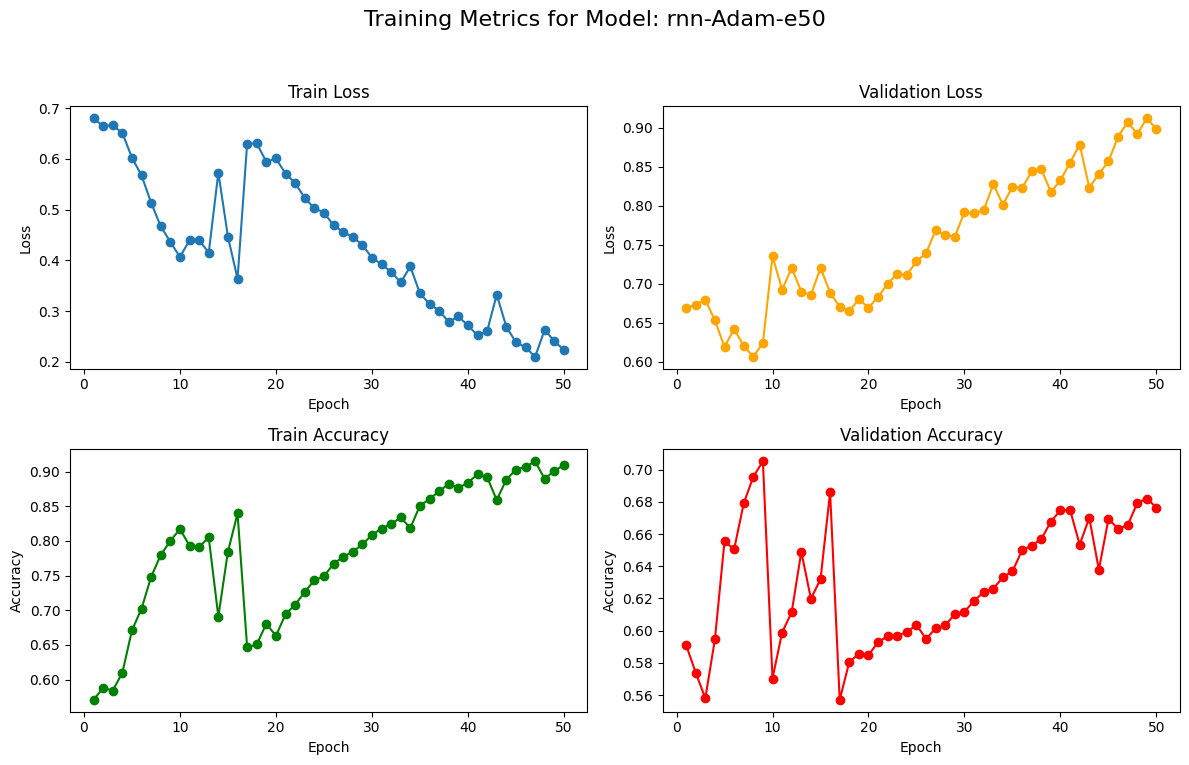

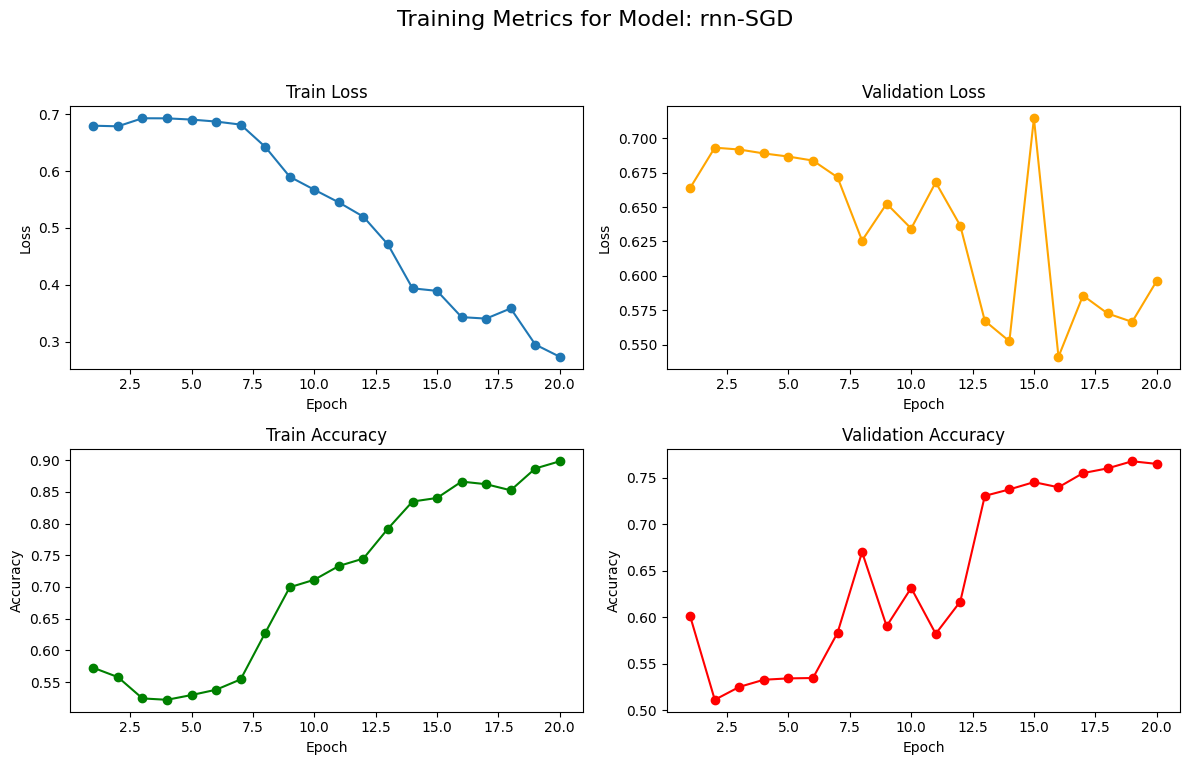

In [11]:
for model_name, epochs in history.items():
    df = pd.DataFrame(epochs)

    # Create a 2x2 subplot for each model
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"Training Metrics for Model: {model_name}", fontsize=16)

    # Train Loss
    axs[0, 0].plot(df["epoch"], df["train_loss"], marker="o")
    axs[0, 0].set_title("Train Loss")
    axs[0, 0].set_xlabel("Epoch")
    axs[0, 0].set_ylabel("Loss")

    # Validation Loss
    axs[0, 1].plot(df["epoch"], df["valid_loss"], marker="o", color="orange")
    axs[0, 1].set_title("Validation Loss")
    axs[0, 1].set_xlabel("Epoch")
    axs[0, 1].set_ylabel("Loss")

    # Train Accuracy
    axs[1, 0].plot(df["epoch"], df["train_acc"], marker="o", color="green")
    axs[1, 0].set_title("Train Accuracy")
    axs[1, 0].set_xlabel("Epoch")
    axs[1, 0].set_ylabel("Accuracy")

    # Validation Accuracy
    axs[1, 1].plot(df["epoch"], df["valid_acc"], marker="o", color="red")
    axs[1, 1].set_title("Validation Accuracy")
    axs[1, 1].set_xlabel("Epoch")
    axs[1, 1].set_ylabel("Accuracy")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

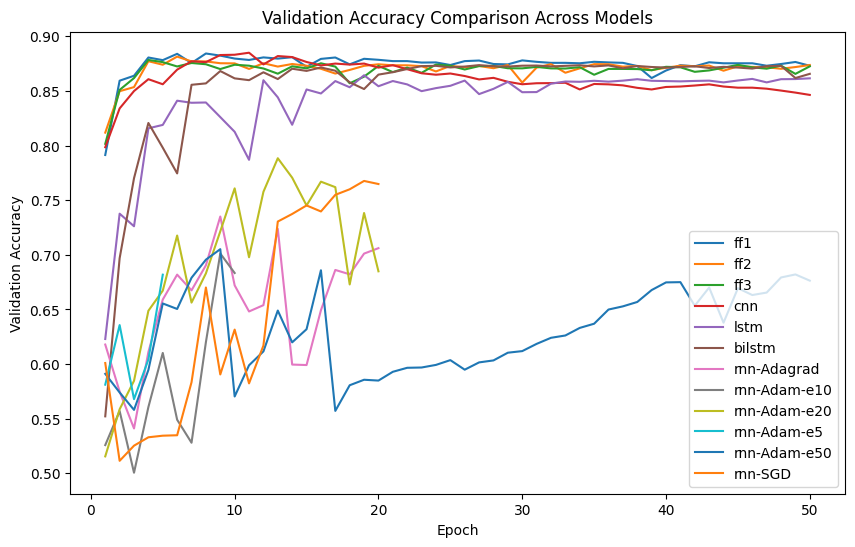

In [12]:
plt.figure(figsize=(10,6))
for model_name, epochs in history.items():
    df = pd.DataFrame(epochs)
    plt.plot(df["epoch"], df["valid_acc"], label=model_name)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison Across Models")
plt.legend()
plt.show()


In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# --- Step 3: Plot each model interactively ---
for model_name, epochs in history.items():
    df = pd.DataFrame(epochs)

    # Create 2x2 subplot layout
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=("Train Loss", "Validation Loss", "Train Accuracy", "Validation Accuracy")
    )

    # Train Loss
    fig.add_trace(go.Scatter(x=df["epoch"], y=df["train_loss"],
                             mode="lines+markers", name="Train Loss"),
                  row=1, col=1)

    # Validation Loss
    fig.add_trace(go.Scatter(x=df["epoch"], y=df["valid_loss"],
                             mode="lines+markers", name="Val Loss"),
                  row=1, col=2)

    # Train Accuracy
    fig.add_trace(go.Scatter(x=df["epoch"], y=df["train_acc"],
                             mode="lines+markers", name="Train Acc"),
                  row=2, col=1)

    # Validation Accuracy
    fig.add_trace(go.Scatter(x=df["epoch"], y=df["valid_acc"],
                             mode="lines+markers", name="Val Acc"),
                  row=2, col=2)

    # Layout
    fig.update_layout(
        height=700, width=900,
        title_text=f"Training Metrics for Model: {model_name}",
        showlegend=True
    )

    fig.show()

In [15]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Train Loss", "Train Accuracy", "Validation Loss", "Validation Accuracy")
)

# Add traces for each model
for model_name, epochs in history.items():
    df = pd.DataFrame(epochs)

    # Train Loss
    fig.add_trace(go.Scatter(
        x=df["epoch"], y=df["train_loss"],
        mode="lines+markers", name=f"{model_name} Train Loss"
    ), row=1, col=1)

    # Train Accuracy
    fig.add_trace(go.Scatter(
        x=df["epoch"], y=df["train_acc"],
        mode="lines+markers", name=f"{model_name} Train Acc"
    ), row=1, col=2)

    # Validation Loss
    fig.add_trace(go.Scatter(
        x=df["epoch"], y=df["valid_loss"],
        mode="lines+markers", name=f"{model_name} Val Loss"
    ), row=2, col=1)

    # Validation Accuracy
    fig.add_trace(go.Scatter(
        x=df["epoch"], y=df["valid_acc"],
        mode="lines+markers", name=f"{model_name} Val Acc"
    ), row=2, col=2)

# --- Step 4: Layout ---
fig.update_layout(
    height=800, width=1000,
    title_text="Training & Validation Metrics Across Models",
    legend=dict(x=1.05, y=1)  # move legend outside
)

fig.show()

In [18]:
test_df = pd.read_csv("history/test-accuracies-by-epoch.csv")
test_df.sort_values("best", ascending=False)

,model,best
3,cnn,0.877126
0,ff1,0.864003
2,ff3,0.858967
1,ff2,0.858488
5,bilstm,0.848857
4,lstm,0.827126
10,rnn-Adam-e20,0.766152
7,rnn-SGD,0.736165
11,rnn-Adam-e50,0.713539
9,rnn-Adam-e10,0.697642
